This is Ramkishore Rao's Project - Application of Tensor Flow and Keras for Loan Dataset

In [ ]:
import tensorflow.keras
from tensorflow . keras .models import Sequential
from tensorflow . keras . layers import Dense , Activation
from tensorflow . keras . callbacks import EarlyStopping
from sklearn . model_selection import train_test_split

In [53]:
import numpy as np
import pandas as pd
from sklearn import metrics
import sklearn
from sklearn.model_selection import train_test_split
import io
import requests
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt



In [ ]:


df = pd.read_csv('/initialmodel2.csv', on_bad_lines="skip", engine="python")


In [ ]:
df.head()
len(df)

209011

# New Section

In [ ]:
df1 = df.pop('Defaulted')

df['Defaulted'] = df1

df.drop(['Unnamed: 0'] , axis = 1, inplace =True)

df = df.dropna()
print(df.head())



   VerificationType  LanguageCode       Age  Gender  AppliedAmount    Amount  \
0               4.0             1  0.673077     1.0       0.192041  0.192041   
1               1.0             1  0.615385     1.0       0.275145  0.275145   
2               4.0             1  0.500000     0.0       0.999810  0.854497   
3               3.0             6  0.461538     0.0       0.132681  0.132681   
4               4.0             6  0.307692     1.0       0.141704  0.093741   

   Interest  LoanDuration  MonthlyPayment  UseOfLoan  ...  Rating_F  \
0  0.053336      0.487179        0.026198          2  ...         0   
1  0.038358      0.487179        0.035782          3  ...         0   
2  0.024937      0.487179        0.113391          3  ...         0   
3  0.128924      0.487179        0.026822          2  ...         1   
4  0.237814      0.384615        0.042723          7  ...         0   

   Rating_HR  Rating_nan  Status_Late  Status_Repaid  Status_nan  \
0          0           0

Split dataframe into X and y

In [ ]:
X = df.iloc[:, :-1]

Y = df.iloc[:,-1].astype(int)

# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1, test_size = 0.2)


Split train into train1 and val1

In [ ]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, random_state = 1, test_size = 0.15)

In [ ]:

model = Sequential()
model.add(Dense(100, input_dim=X_train1.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(X_train1,y_train1,validation_data=(X_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)


Epoch 1/1000
4442/4442 - 11s - loss: 0.3578 - accuracy: 0.8319 - val_loss: 0.3027 - val_accuracy: 0.8785 - 11s/epoch - 2ms/step
Epoch 2/1000
4442/4442 - 9s - loss: 0.2331 - accuracy: 0.9031 - val_loss: 0.2305 - val_accuracy: 0.9078 - 9s/epoch - 2ms/step
Epoch 3/1000
4442/4442 - 10s - loss: 0.2167 - accuracy: 0.9087 - val_loss: 0.1875 - val_accuracy: 0.9214 - 10s/epoch - 2ms/step
Epoch 4/1000
4442/4442 - 13s - loss: 0.2061 - accuracy: 0.9118 - val_loss: 0.1796 - val_accuracy: 0.9230 - 13s/epoch - 3ms/step
Epoch 5/1000
4442/4442 - 18s - loss: 0.1993 - accuracy: 0.9146 - val_loss: 0.2351 - val_accuracy: 0.8937 - 18s/epoch - 4ms/step
Epoch 6/1000
4442/4442 - 20s - loss: 0.1959 - accuracy: 0.9158 - val_loss: 0.1798 - val_accuracy: 0.9216 - 20s/epoch - 4ms/step
Epoch 7/1000
4442/4442 - 13s - loss: 0.1945 - accuracy: 0.9161 - val_loss: 0.1701 - val_accuracy: 0.9258 - 13s/epoch - 3ms/step
Epoch 8/1000
4442/4442 - 10s - loss: 0.1898 - accuracy: 0.9188 - val_loss: 0.3725 - val_accuracy: 0.8289 -

In [ ]:
pred = model.predict(X_test)
pred

array([[0.00305799],
       [0.8280401 ],
       [0.99999976],
       ...,
       [0.0304265 ],
       [0.19987822],
       [0.99999964]], dtype=float32)

In [57]:
mse2 = mean_squared_error(pred1, y_test, squared=False)

In [58]:
mse2

0.2612934083581585

In [ ]:
pred1 = np.round(pred) # this takes continues output and transforms to binary values of 0 and 1

In [ ]:
pred1 # this is the output target value array for the test dataset

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
accuracy1 = accuracy_score(y_test, pred1)
precision1 = precision_score(y_test, pred1)
recall1 = recall_score(y_test, pred1)
F1_score = f1_score(y_test, pred1)
confusion_mat_test = confusion_matrix(y_test, pred1)

In [ ]:
confusion_mat_test

array([[26101,  1086],
       [ 1768, 12847]])

In [ ]:
accuracy1

0.9317257547485767

In [ ]:
precision1

0.9220555515682194

In [ ]:
recall1

0.8790283954840917

In [ ]:
F1_score

0.9000280229788427

In [ ]:
auc= roc_auc_score(y_test, pred1)

print(auc)

0.9195414166334277


In [51]:
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

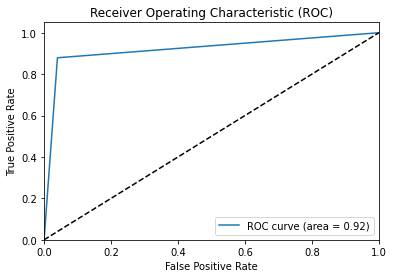

In [56]:
pred = model.predict(X_test)
plot_roc(pred1, y_test)